<a href="https://colab.research.google.com/github/Lucky3210/AI_Learning/blob/main/ML_magic_tut.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


**DATASET:**

Data are MC generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope.

We want to predict that given the input flength, fwidth, fsize etc what class of radiation is it.. is it gamma(g) or hardronic(h). Therefore a classification problem.

In [8]:
# View data structure and check for attributes like lables
# pd.read_csv('magic04.data') # turns the data into pandas dataframe object
# After running it, we see that the dataset doesn't have labels so we had them
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols) # add the columns as labels to the dataset.
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Since we have some input variables with a particular output or target variable, hence it is a **supervised learning exercise**

In [9]:
# our class(output variable) contains two output either g or h
df["class"].unique()


array(['g', 'h'], dtype=object)

In [10]:
# we would want to convert class to 1 and 0

df["class"] = (df["class"] == "g").astype(int)


In [11]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


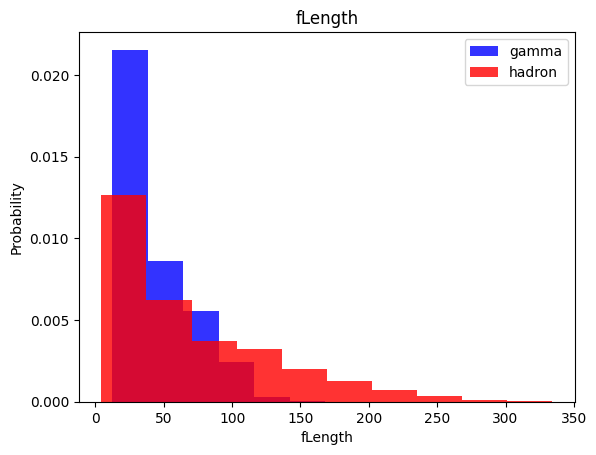

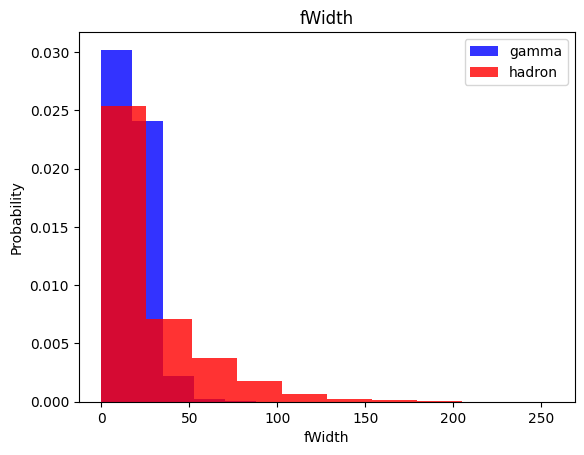

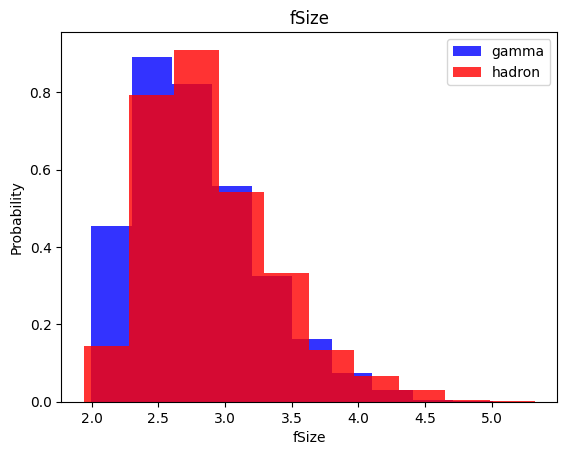

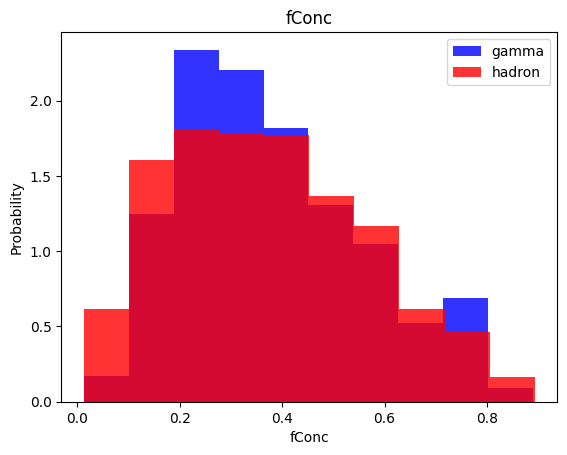

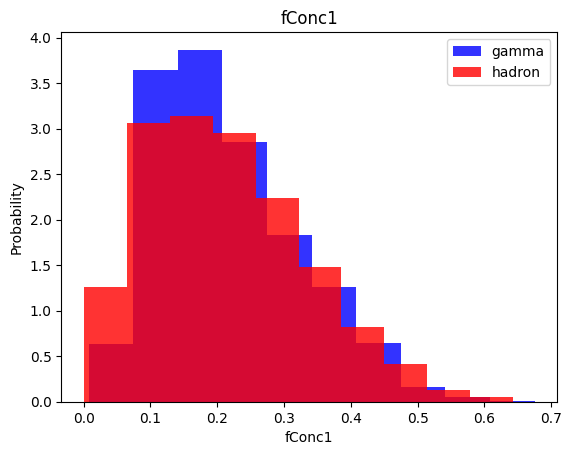

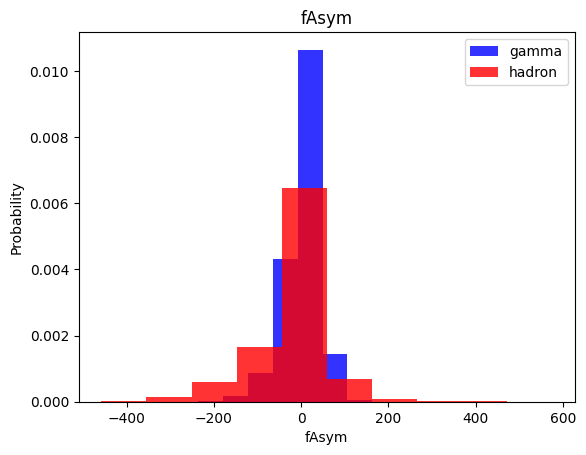

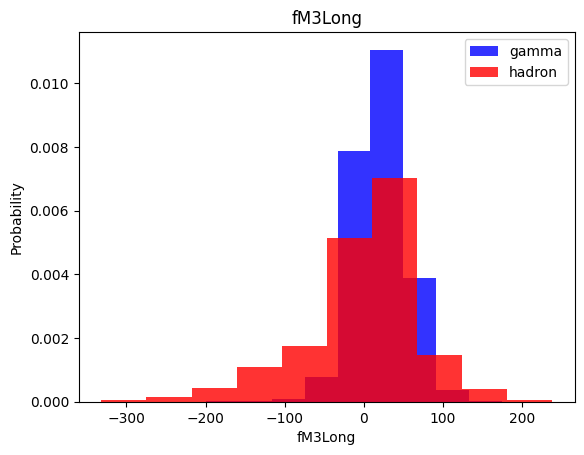

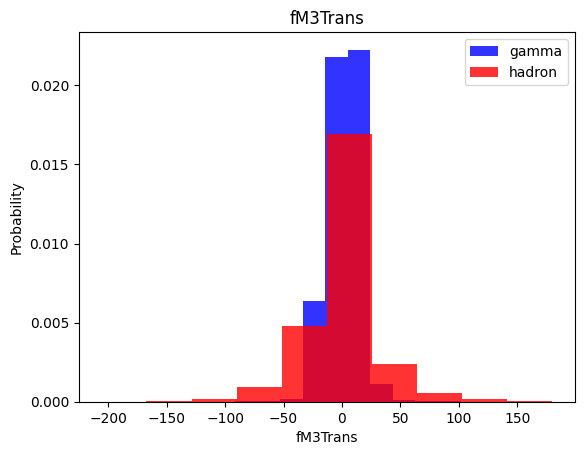

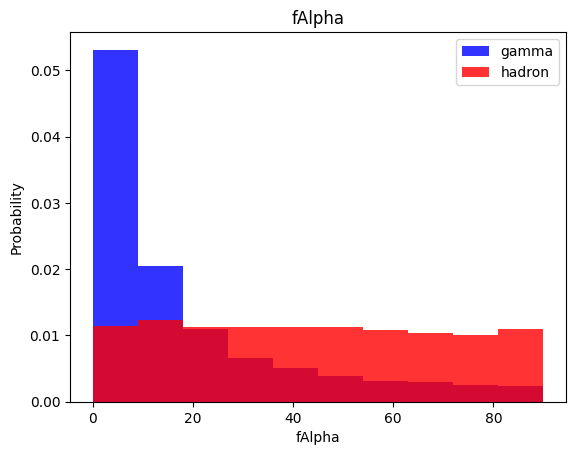

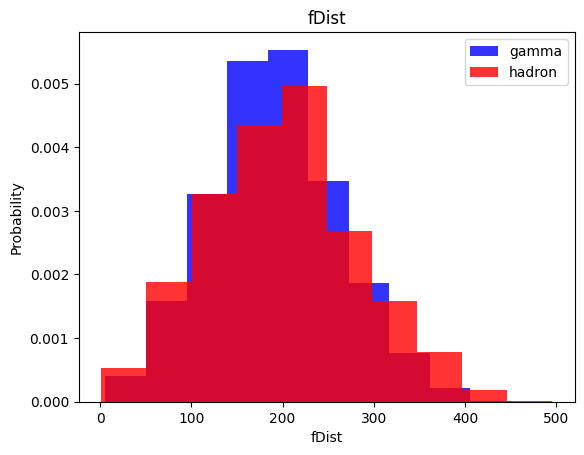

In [12]:
# we want to see the relationship between our class variable and other
# variables.

for label in cols[:-1]:
  plt.hist(df[df['class']==1][label], color='blue', label='gamma', alpha=0.8, density=True)
  plt.hist(df[df['class']==0][label], color='red', label='hadron', alpha=0.8, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

#Train, Validation and Test dataset

In [13]:
# shuffle out data and split it into 3 sets with 60% of the data as the training data
# then from 60% to 80% for validation and then from 80% to 100% for testing.

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [14]:
# we should scale our data to be relative to mean and standard deviation of that
# column, examining our data we see that some columns has some data in 100s and some in 0. hence we scale

def scaleDataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # get the input variable X
  y = dataframe[dataframe.columns[-1]].values # get the output variabl y

  scaler = StandardScaler()
  # with the scaler function, we can fit and transform X
  X = scaler.fit_transform(X) # fit standard scaler to x and transform those values

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y) # this takes the less class y and keeps sampling there to increase the size of the small dataset


  # create the whole data as a 2D numpy array
  # hstack simply say take an array and another array and stack them horizontally.
  # numpy is dimension specific, here X is a 2D array and y is 1D array so we pass in the reshape method
  # with its dimension to reshape the y array, with -1 as an argument in the reshape method,
  # numpy will automatically calculate it based on the other dimensions. [e.g (2, 3) means reshape into 2 rows and 3 columns]
  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [15]:

# print(len(train[train['class']==1]))
# print(len(train[train['class']==0]))
# printing out the length of the training set we see that they are not evenly balanced,
# so we might want to oversample them

train, X_train, y_train = scaleDataset(train, oversample=True)
valid, X_valid, y_valid = scaleDataset(valid, oversample=False) # we don't want to oversample out validation and testing set
test, X_test, y_test = scaleDataset(test, oversample=False) # so that our model treats it as a random set of data


# kNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [17]:
knnModel = KNeighborsClassifier(n_neighbors=5)
knnModel.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
yPred = knnModel.predict(X_test)

correct = (y_test == yPred).sum()
incorrect = (y_test != yPred).sum()
total = len(yPred)

# Print results
print(f"Results for model {type(knnModel).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

# Using the classification report
print(classification_report(y_test, yPred))

Results for model KNeighborsClassifier
Correct: 3075
Incorrect: 729
Accuracy: 80.84%
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      1356
           1       0.85      0.86      0.85      2448

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



#Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB


In [20]:
nbModel = GaussianNB()
nbModel.fit(X_train, y_train) # fit the model

GaussianNB()

In [22]:
yPred = nbModel.predict(X_test)

correct = (y_test == yPred).sum()
incorrect = (y_test != yPred).sum()
total = len(yPred)

# Print results
print(f"Results for model {type(nbModel).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

# Using the classification report
print(classification_report(y_test, yPred))

Results for model GaussianNB
Correct: 2718
Incorrect: 1086
Accuracy: 71.45%
              precision    recall  f1-score   support

           0       0.66      0.40      0.50      1356
           1       0.73      0.89      0.80      2448

    accuracy                           0.71      3804
   macro avg       0.70      0.65      0.65      3804
weighted avg       0.71      0.71      0.69      3804



#Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logModel = LogisticRegression() # by default this uses the l2 loss function
logModel.fit(X_train, y_train)

LogisticRegression()

In [25]:
yPred = logModel.predict(X_test)

correct = (y_test == yPred).sum()
incorrect = (y_test != yPred).sum()
total = len(yPred)

# Print results
print(f"Results for model {type(logModel).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

# Using teh classification report
print(classification_report(y_test, yPred))

Results for model LogisticRegression
Correct: 2985
Incorrect: 819
Accuracy: 78.47%
              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1356
           1       0.84      0.82      0.83      2448

    accuracy                           0.78      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.78      0.79      3804



#SVM

In [26]:
from sklearn.svm import SVC

In [27]:
svmModel = SVC()
svmModel.fit(X_train, y_train) # fit the model

SVC()

In [28]:
yPred = svmModel.predict(X_test)

correct = (y_test == yPred).sum()
incorrect = (y_test != yPred).sum()
total = len(yPred)

# Print results
print(f"Results for model {type(svmModel).__name__}")
print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {100 * correct / total:.2f}%")

# Using teh classification report
print(classification_report(y_test, yPred))

Results for model SVC
Correct: 3220
Incorrect: 584
Accuracy: 84.65%
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1356
           1       0.88      0.88      0.88      2448

    accuracy                           0.85      3804
   macro avg       0.83      0.83      0.83      3804
weighted avg       0.85      0.85      0.85      3804



#Neural Net

In [29]:
import tensorflow as tf

In [ ]:
nnModel = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(10, )),
    tf.keras.layers.Dense(16, activation='relu')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

nnModel.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='binary_crossentropy', metrics=['accuracy'])